# Tutorial de imágenes astronómicas: Introducción

Este tutorial tiene como intención familiarizarse con las herramientas de python necesarias para analizar imágenes astronómicas.

## 1) Paquetes necesarios

Los paquetes absolutamente necesarios son casi los mismos que se usan en métodos computacionales 1: numpy, matplotlib, pandas, scipy y sklearn. Las nuevas adiciones serán astropy y photutils. 

Desde un cuaderno de jupyter se puede invocar a la consola usando `!` al inicio de una línea:

In [1]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


Para instalar paquetes de python se usa `pip`. Dependiendo de su sistema, puede estar bajo el nombre `pip3`. A continuación instalaremos los paquetes mencionados que usaremos a lo largo del curso:

In [4]:
!pip3 install --upgrade numpy scipy matplotlib pandas "astropy[recommended]" photutils scikit-image

^C


Siempre que no haya nada en rojo, quiere decir que los paquetes se instalaron correctamente. 

## 2) Imágenes .fits

### 2.1) Lectura de archivos y directorios en python

En la carpeta `data` hay dos archivos `.fits`. Cuando son pocos archivos, podríamos importar directamente `A.fits` y `B.fits` sin problema; pero más adelante, cuando estemos lidiando con muchas imágenes, conviene tener una manera de que python detecte las imágenes en una carpeta. 

Para esto usaremos el paquete `glob`.

In [3]:
from glob import glob

glob efectivamente sirve como un `ls`, pero dentro de python, y ligeramente más poderoso, porque nos reotrna una lista con los nombres de archivo como strings, que podemos usar en python.

In [4]:
glob("*")

['data', 'introducción.ipynb']

Para escoger los archivos `.fits` que están en la carpeta `data`, usamos:

In [5]:
files = glob("data/*.fits")
files

['data\\A.fits', 'data\\B.fits']

El paquete `astropy` tiene herramientas para leer información de estos archivos `.fits`. Para eso importamos:

In [6]:
from astropy.io import fits

En jupyter podemos obtener información de un objeto preguntando por él. Veamos la descripción del módulo que acabamos de importar:

In [7]:
fits?

Type:        module
String form: <module 'astropy.io.fits' from 'c:\\Users\\valen\\anaconda3\\lib\\site-packages\\astropy\\io\\fits\\__init__.py'>
File:        c:\users\valen\anaconda3\lib\site-packages\astropy\io\fits\__init__.py
Docstring:  
A package for reading and writing FITS files and manipulating their
contents.

A module for reading and writing Flexible Image Transport System
(FITS) files.  This file format was endorsed by the International
Astronomical Union in 1999 and mandated by NASA as the standard format
for storing high energy astrophysics data.  For details of the FITS
standard, see the NASA/Science Office of Standards and Technology
publication, NOST 100-2.0.


Para cada una de nuestras imágenes conviene ver la información general de la imagen, que se obtiene con la función `fits.info`.

In [8]:
for file in files:
    print(fits.info(file))

Filename: data\A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None
Filename: data\B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None


Las tres funciones que veremos (info,getheader,getdata) aceptan la ruta del archivo como string:

In [9]:
fits.info("data/A.fits")

Filename: data/A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   


### 2.2) Headers

Las imágenes FITS contienen, además de datos numéricos, un "header" con información adicional que puede ser útil para su uso científico. Podemos ver el header así:

In [10]:
fits.getheader("data/A.fits")

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  318  /                                               
NAXIS2  =                  509  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'im010.imh'           /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           1.064900E4  /  DATA MAX                                     
IRAF-MIN=           4.810000E2  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '        

podemos obtener todos los headers de nuestras imágenes:

In [11]:
headers = [fits.getheader(f) for f in files]

Los atributos del header se acceden como si se trataran de diccionarios de python:

In [12]:
headers[0]["OBJECT"]

'M-92 V'

In [13]:
headers[0]["EXPTIME"]

60

In [14]:
headers[0]["DATE-OBS"]

'01/09/87'

### 2.3) datos

Los datos de la imagen se obtienen con `fits.getdata`, y serán guardados en arrays de numpy bidimensionales.

Por esto importamos numpy, antes que nada.

In [15]:
import numpy as np
np.set_printoptions(linewidth=120) # para que se vea

y ahora sí importamos las imágenes como tal:

In [16]:
images = [fits.getdata(f) for f in files]

In [17]:
images[0]

array([[37.184605, 47.360104, 49.133606, ..., 40.524715, 39.21413 , 37.51868 ],
       [41.218204, 47.555954, 48.699158, ..., 43.074856, 54.495537, 50.512478],
       [40.18866 , 42.581043, 53.572693, ..., 44.766705, 37.798122, 59.58666 ],
       ...,
       [47.135468, 40.28973 , 52.449577, ..., 35.836357, 42.49507 , 54.60417 ],
       [44.669   , 39.22278 , 46.34222 , ..., 34.451347, 45.486805, 44.37549 ],
       [38.97707 , 46.36016 , 40.002304, ..., 53.20716 , 54.100876, 58.340065]], dtype=float32)

Con esto podemos hacer operaciones sobre los datos, como se haría con cualquier otro array de numpy.

In [18]:
images[0].max()

10160.793

In [19]:
images[0].min()

-7.8015227

In [20]:
images[0].mean()

46.84091

In [21]:
np.median(images[0])

42.498184

In [22]:
np.std(images[0])

93.601685

### 2.4) Visualización con matplotlib

In [23]:
import matplotlib.pyplot as plt

Usaremos la función imshow:

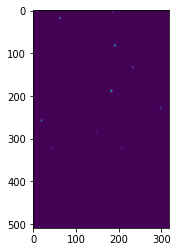

In [24]:
plt.imshow(images[0])

No se ve demasiado, y los colores son artificiales. Podemos cambiar el tamaño de la figura y el mapa de color utilizado para representar los datos.
También recomiendo cambiar el origen de los ejes a "lower".

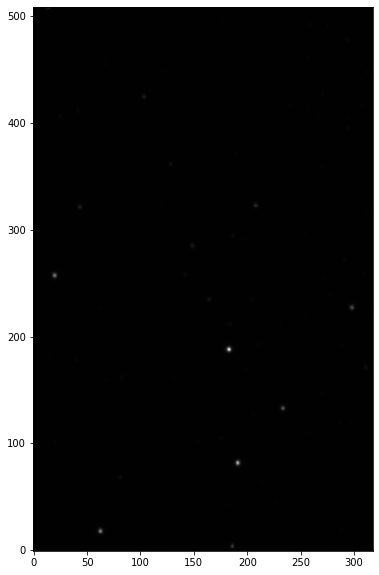

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(images[0],cmap="gray",origin="lower")

Estos cambios se pueden hacer permanentes de esta forma:

In [26]:
#plt.rcParams["figure.figsize"] = (10,10) # no recomendado
plt.rcParams["image.cmap"] = "gray" # pueden ver más colormaps aquí: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

Para visualizar mejor la imagen se limitan los colores con los argumentos `vmin` y `vmax`.

También podemos darnos una idea de qué valores de cuentas estamos viendo con una barra de color.

Juegue con los valores de vmin y vmax hasta poder ver las estrellas del fondo, y quizás un poco del ruido del cielo:

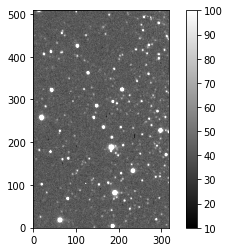

In [27]:
p = plt.imshow(images[0],vmin=10,vmax=100)
plt.colorbar(p)

Uno puede tantearlos imagen a imagen, pero claramente hay maneras más elegantes de hacerlo. 
Podemos definir una función que llame a `plt.imshow`, pero que automáticamente nos ponga el `vmin` y `vmax` a los cuantiles 1% y 99% de los datos de la imagen:

In [28]:
def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

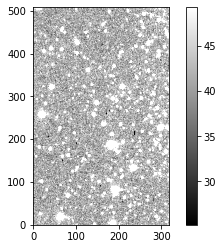

In [29]:
p = quantile_imshow(images[0],upper=0.8)
plt.colorbar(p)

Lo cual nos permite ver mucho más de la imagen que sólo las estrellas brillantes.

Esto ya nos dice algo acerca de las imágenes fotométricas: 
* Usualmente el cielo es muy poco brillante, y esto compone la mayoría de los pixeles de la imagen
* Hay unos pocos puntos ---las estrellas--- muy brillantes.

Esto lo podemos comprobar haciendo un histograma de los valores de los pixeles de la imagen. 
Para esto necesitamos primero aplanar (temporalmente) la imagen de un array 2D:

In [30]:
images[0].shape

(509, 318)

a un array 1D:

In [31]:
flattened = images[0].ravel()
flattened.shape

(161862,)

Ahora podemos hacer el histograma. Modifique el argumento `bins` para que en lugar de que el histograma se vea desde el mínimo a máximo de los datos, use el vmin y el vmax que encontró arriba para la imagen.

Text(0, 0.5, 'Frecuencia')

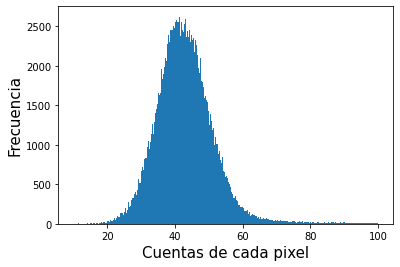

In [32]:
plt.hist(flattened,bins=np.linspace(10,100,300))
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

Podemos usar una escala log-log para poder apreciar todos los datos, sean cielo o estrellas:

Text(0, 0.5, 'Frecuencia')

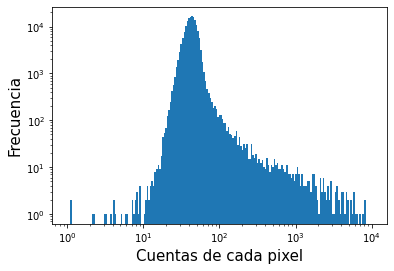

In [33]:
plt.hist(images[0].ravel(),bins=np.logspace(0,4,200),log=True); # qué está haciendo logspace aquí?
plt.xscale("log")
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

### Ejercicio 1

> Defina otra función, llamada `my_imshow`, que ponga automáticamente los `vmin` y `vmax`, pero esta vez a un número dado de desviaciones estándar del promedio de la imagen.
> Es decir, dado $n$,
> $$v_{min}= \mu - n  \sigma$$
> $$v_{max}= \mu + n  \sigma$$
> El `n` por defecto podría ser 5.

Nota: ya que tenemos puntos "atípicos" (las estrellas) la media y la desviación estándar se ven gravemente afectadas, y pueden no ser la mejor idea.
Algunas alternativas son:

* Lo clásico en astronomía: usar "sigma clipping", para lo cual existe el módulo `astropy.stats.sigma_clipping`, y su función `sigma_clipped_stats`.
* La media (`np.median`) como estimador de localización, y la MAD como estimador de escala (`scipy.stats.median_abs_deviation`).
* Estimadores robustos un poco más elegantes, disponibles en `astropy.stats.biweight.biweight_location` y `astropy.stats.biweight.biweight_scale`.

Yo la verdad me quedo con mis cuantiles la mayoría de las veces.

52.79265594482422


ValueError: 5 is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

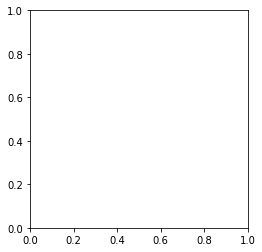

In [69]:
from astropy.stats import biweight_location, biweight_scale
from astropy.stats import sigma_clipped_stats
from scipy.stats import median_abs_deviation
img=images[0]
n = 2
a = np.median(img) + n*median_abs_deviation(img.ravel())
print(a)
b = np.median(img) + n*median_abs_deviation(img.ravel())
# respuesta

def my_imshow(img,n,lower=0.01,upper=0.99, **kwargs):
    img_vmin = np.median(img) + n*median_abs_deviation(img.ravel())
    img_vmax = np.median(img) + n*median_abs_deviation(img.ravel())
    return plt.imshow(img,n,vmin=img_vmin,vmax=img_vmax, **kwargs)

p = my_imshow(images[0],5,upper=0.8)
plt.colorbar(p)

### 2.5) subplots y zoom

Podemos ver las imágenes al tiempo usando subplots:

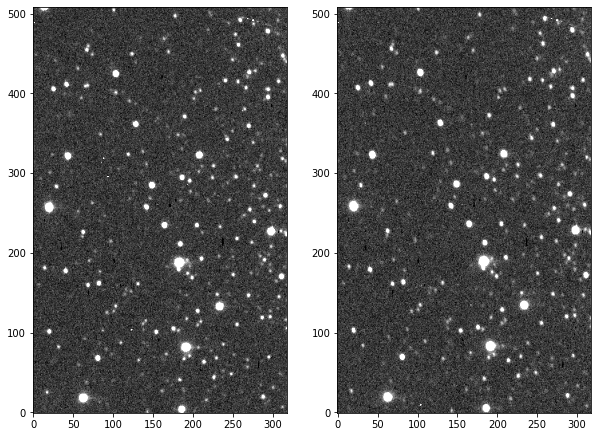

In [34]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

plt.sca(ax[0]) # sca: Set Current Axis
quantile_imshow(images[0])

plt.sca(ax[1]) # sca: Set Current Axis
quantile_imshow(images[1])

In [ ]:
#Gradiente de la imagen. Bota dos imagenes


NameError: name 'my_imshow' is not defined

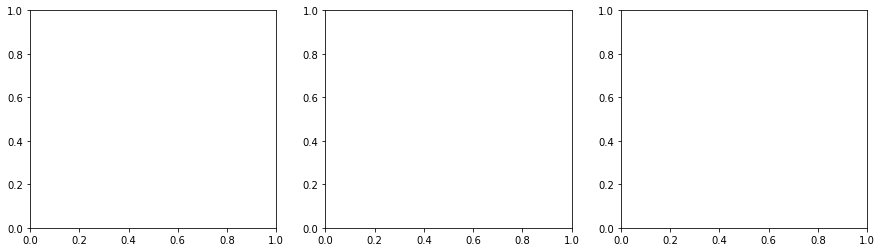

In [35]:
fig,ax = plt.subplots(ncols=3, figsize=(15,4))

for i in range(3):
    plt.sca(ax[i])
    p = my_imshow(images[0], lower=0.1, upper=1-0.1**(i+1))
    plt.title('upper quantile = '+str(1-0.1**(i+1)))
    plt.colorbar(p)
plt.tight_layout()


A primera vista son completamente iguales. Podemos ver un poco más de cerca usando slicing. 

Seleccionemos esa primera estrella brillante en la esquina inferior. Como primer paso, seleccionemos los pixeles de 0 a 100 en x y en y:

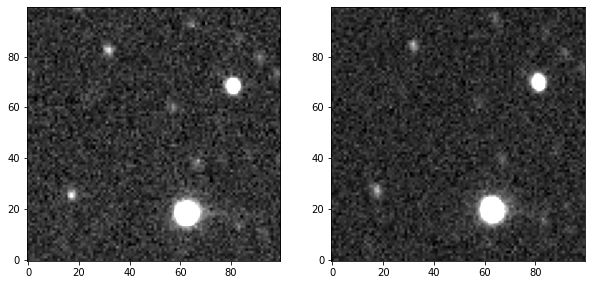

In [36]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image[:100,:100])

La estrella parece estar en el pixel 60,20, más o menos. Pero algo para tener en cuenta es que en numpy el orden de los ejes es `[y,x]`.
Entonces, si queremos ver a detalle esa estrella, queremos el slice `[y=10:30, x=50:70]`

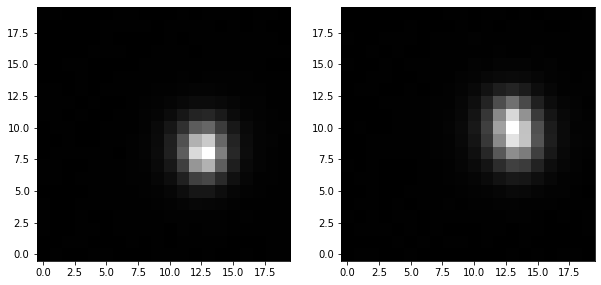

In [37]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[10:30,50:70])

Podemos observar que la estrella está ligeramente corrida. Dado que las imágenes fueron tomadas a tres minutos la una de la otra:

In [38]:
for h in headers:
    print(h["DATE-OBS"]+h["UT"])

01/09/87 3:30:24.00
01/09/87 3:33:18.00


Es razonable pensar que es un efecto del telescopio, no de la estrella. Esto también se puede comprobar porque todas las estrellas estarían corridas de la misma forma.

Podemos ayudarnos poniendo un "crosshair" en la imagen, con las siguientes dos funciones de matplotlib:

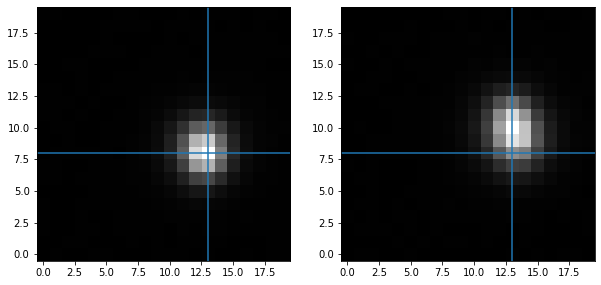

In [39]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[10:30,50:70])
    plt.axvline(13.0) # axis vertical line
    plt.axhline(8.0) # axis horizontal line

O también sumando la imagen en x y en y, y comparando los picos que representa la estrella:

In [160]:
sum_y = [image[10:30,50:70].sum(axis=0) for image in images]
sum_x = [image[10:30,50:70].sum(axis=1) for image in images]

#Es una manera de a través de sus picos, comparar qué tanto se corrió

In [161]:
from scipy.optimize import curve_fit
from scipy.stats import norm

In [95]:

"""
def gauss(x, A, B): 
    y = A*np.exp(-1*B*x**2) 
    return y 
x_data = np.arange(0,20)
y_data = sum_y[1]

#optimal_params, covariance = curve_fit(gauss, x_data, y_data, p0=[1.0, 1.0, 0.0, 1.0])
parameters, covariance = curve_fit(gauss, x_data, y_data ) 
  
# Extract the optimal parameter values
H_optimal, A_optimal, x0_optimal, sigma_optimal =parameters

fit_A = parameters[0] 
fit_B = parameters[1] 
  
fit_y = gauss(x_data, fit_A, fit_B) 
plt.plot(x_data, y_data, 'o', label='data') 
plt.plot(x_data, fit_y, '-', label='fit') 
plt.legend()"""

"\ndef gauss(x, A, B): \n    y = A*np.exp(-1*B*x**2) \n    return y \nx_data = np.arange(0,20)\ny_data = sum_y[1]\n\n#optimal_params, covariance = curve_fit(gauss, x_data, y_data, p0=[1.0, 1.0, 0.0, 1.0])\nparameters, covariance = curve_fit(gauss, x_data, y_data ) \n  \n# Extract the optimal parameter values\nH_optimal, A_optimal, x0_optimal, sigma_optimal =parameters\n\nfit_A = parameters[0] \nfit_B = parameters[1] \n  \nfit_y = gauss(x_data, fit_A, fit_B) \nplt.plot(x_data, y_data, 'o', label='data') \nplt.plot(x_data, fit_y, '-', label='fit') \nplt.legend()"

22.64369587985337


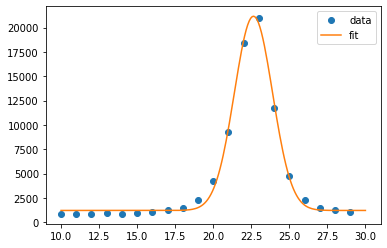

In [162]:
xdata= np.arange(10,30)
ydata = sum_y[0]
# Define the Gaussian function 
def Gauss(x, A, B, c,s): 
    y = B+A*np.exp(-(((x-c)/s)**2))
    return y 
parameters, covariance = curve_fit(Gauss, xdata, ydata, p0=[20000, ydata.min(), 23, 1 ]) 

indices = np.linspace(10,30, 200)  
fit_values = Gauss(indices, *parameters)
#A es la amplitud, B el mínimo, C el centro y s el ancho de la campana/2
fit_A = parameters[0] 
fit_B = parameters[1] 
fit_C = parameters[2]
fit_D = parameters[3]
print(fit_C)
fit_y = Gauss(xdata, fit_A, fit_B, fit_C, fit_D) 
plt.plot(xdata, ydata, 'o', label='data') 
#plt.plot(xdata, fit_y, '-', label='fit') 
plt.plot(indices, fit_values, '-', label='fit')
plt.legend()

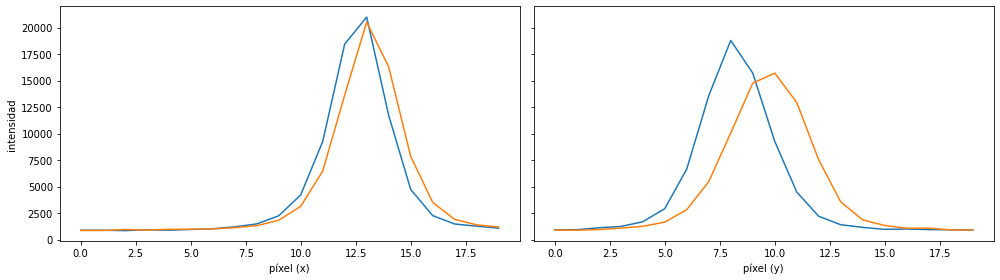

In [163]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sum_y[0])
plt.plot(sum_y[1])
plt.xlabel("píxel (x)")
plt.ylabel("intensidad")

plt.sca(ax[1])
plt.plot(sum_x[0])
plt.plot(sum_x[1])
plt.xlabel("píxel (y)")

plt.tight_layout()

In [ ]:
'''Centrar la estrellla manualmente en un cuadrito, sumar todos los pixeles en x y y. Gráfica de suma en x vs pixeles, Gráfica de suma en y vs. pixeles. El centro es c-y para la suma en x y c-x para la suma en y.
scipy.ndimage.shift(img, deltax, deltay) --> mueve la imagen
restar imágenes (histograma centrado en CEPO)
'''

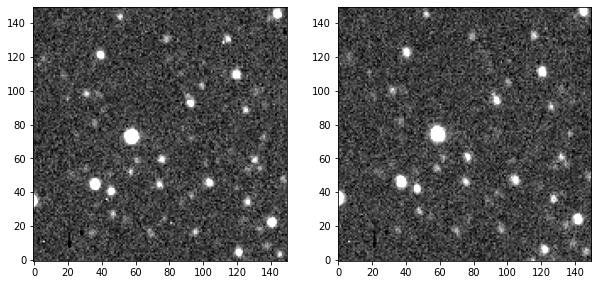

In [51]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    a =image[250:400,150:300]
    #a = quantile_imshow(image[250:400,150:300])
    quantile_imshow(a)

#el slicing es primero en y y luego en x porque la imagen está invertida

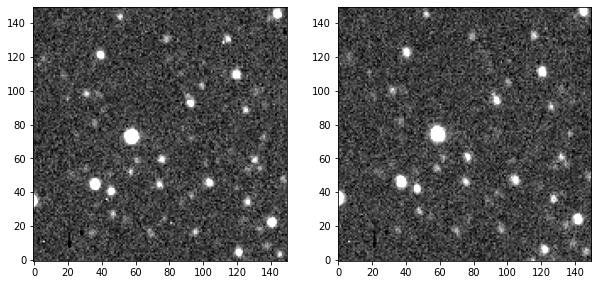

In [166]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    #a =image[250:400,150:300]
    #a = quantile_imshow(image[250:400,150:300])
    quantile_imshow(image[250:400,150:300])

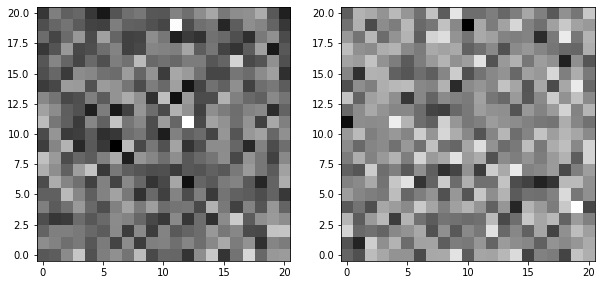

In [168]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    #plt.imshow(image[:60,:60])
    #plt.imshow(a[:60,:60])
    plt.imshow(image[35:56,20:41])

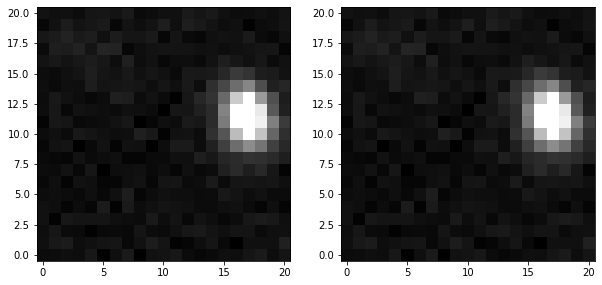

In [73]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    #plt.imshow(image[:60,:60])
    #plt.imshow(a[:60,:60])
    quantile_imshow(a[35:56,20:41])


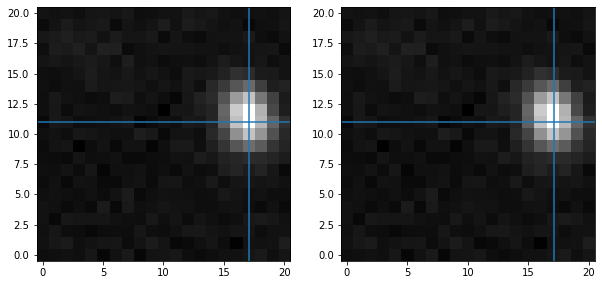

In [74]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(a[35:56,20:41])
    plt.axvline(17.1) # axis vertical line
    plt.axhline(11.0) # axis horizontal line

In [172]:
sumy = [a[35:56,20:41].sum(axis=0) for image in images]
sumx = [a[35:56,20:41].sum(axis=1) for image in images]

#Es una manera de a través de sus picos, comparar qué tanto se corrió

In [177]:
mediana = np.median(sumy)
mediana

937.58575

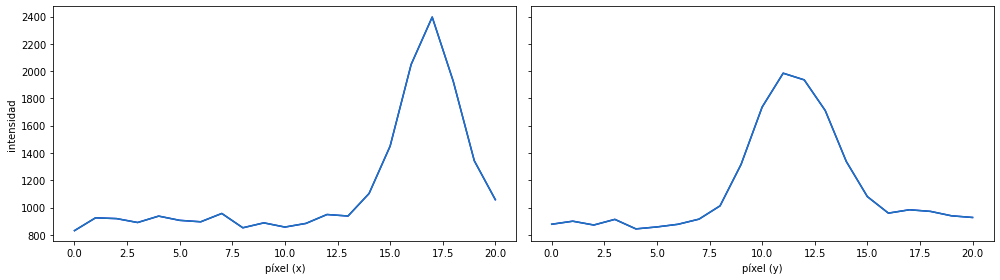

In [173]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sumy[0], color='blue')
plt.plot(sumy[1])
plt.xlabel("píxel (x)")
plt.ylabel("intensidad")

plt.sca(ax[1])
plt.plot(sumx[0], color='blue')
plt.plot(sumx[1])
plt.xlabel("píxel (y)")

plt.tight_layout()

16.89661392293878


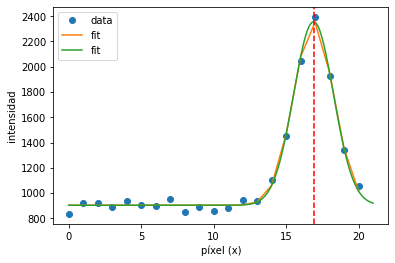

In [183]:
x_data= np.arange(0,21)
y_data = sumy[0]
# Define the Gaussian function 
'''
def Gauss(x, A, B, c,s): 
    y = B+A*np.exp(-(((x-c)/s)**2))
    return y '''
params, covariance = curve_fit(Gauss, x_data, y_data, p0=[2400, y_data.min(), 17, 1.5 ]) 

index = np.linspace(0,21, 200)  
fit_val = Gauss(index, *params)
#A es la amplitud, B el mínimo, C el centro y s el ancho de la campana/2
fitA = params[0] 
fitB = params[1] 
fitC = params[2]
fitD = params[3]
print(fitC)
fity = Gauss(x_data, fitA, fitB, fitC, fitD) 
plt.plot(x_data, y_data, 'o', label='data') 
plt.plot(x_data, fity, '-', label='fit') 
plt.plot(index, fit_val, '-', label='fit')
plt.axvline(x = fitC, ymin = 0, ymax = 1, linestyle ="--",color ='red')
plt.xlabel('píxel (x)')
plt.ylabel('intensidad')
plt.legend()

11.511612421858766


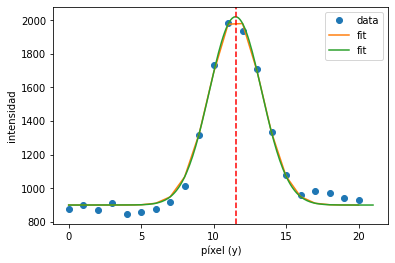

In [184]:
#Pixel en y
x_dat = np.arange(0,21)
y_dat = sumx[1]

parametros, cov = curve_fit(Gauss, x_dat, y_dat, p0=[2000, y_dat.min(), 11.5, 2.75 ]) 

indx = np.linspace(0,21, 200)  
fit_vals = Gauss(indx, *parametros)
#A es la amplitud, B el mínimo, C el centro y s el ancho de la campana/2
fit_AA = parametros[0] 
fit_BB = parametros[1] 
fit_CC = parametros[2]
fit_DD = parametros[3]
print(fit_CC)
fit_yy = Gauss(x_dat, fit_AA, fit_BB, fit_CC, fit_DD) 
plt.plot(x_dat, y_dat, 'o', label='data') 
plt.plot(x_dat, fit_yy, '-', label='fit') 
plt.plot(indx, fit_vals, '-', label='fit')
plt.axvline(x = fit_CC, ymin = 0, ymax = 1, linestyle ="--",color ='red')
plt.xlabel('píxel (y)')
plt.ylabel('intensidad')
plt.legend()

repita el proceso anterior, de hacer zoom y mirar las sumas parciales, pero para la estrella más brillante de la imagen.

### 2.6) Operaciones entre imágenes 

Más adelante se verán maneras más avanzadas de detectar movimiento, rotación, cambios de zoom y hasta perspectiva entre imágenes. Por ahora quisiéramos simplemente aproximar este movimiento como un vector de desplazamiento en pixeles.

Para eso restaremos ambas imágenes. Si las imágenes estuvieran bien alineadas, esta resta debería ser ruido.

Si no lo están, como en este caso, se ve algo como esto:

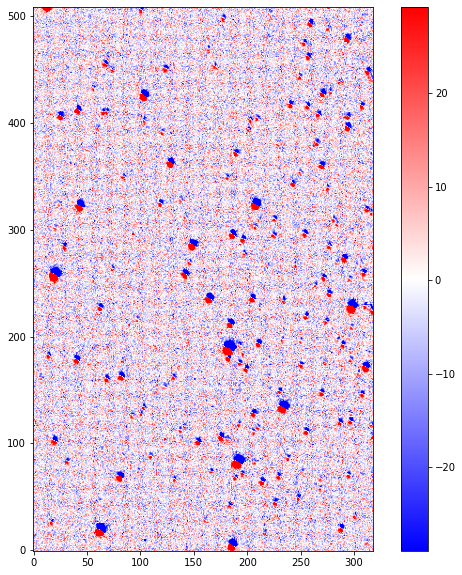

In [90]:
plt.figure(figsize=(10,10))
p = quantile_imshow(images[0] - images[1],cmap="bwr")
plt.colorbar(p)

Así podemos darnos cuenta que todas las estrellas están movidas un poco en x y un poco en y.

### Ejercicio 2 (o tarea, depende de cómo estemos)

> Encuentre el desplazamiento en píxeles en x y y en y entre las dos imágenes.

Esto se puede hacer de muchas maneras. 

* Puede elegir varias estrellas brillantes, hacer mucho zoom, y tratar de sacar el punto máximo a ojo, y promediar sus resultados.

* Puede sumar en x y en y, como vimos antes (con varias estrellas o con toda la imagen) e intentar optimizar el corrimiento en cada eje por separado; es decir, correr una de las curvas en el eje x hasta que los picos se superpongan.

* Si va a transformar la imagen entera, puede usar `scipy.ndimage.shift`, que recibe una imagen y un vector de corrimiento. Podría entonces restar ambas imágenes, sumar los cuadrados, y minimizar con `scipy.optimize.minimize`.

Lo más adecuado en astronomía sería usar las coordenadas (o centroides) de las estrellas, pero eso es algo que aprenderemos más adelante.

In [97]:
from skimage.feature import peak_local_max
from photutils.centroids import centroid_quadratic

In [109]:
peaks = peak_local_max(images[0], threshold_abs=100)


In [141]:
images[0]

array([[37.184605, 47.360104, 49.133606, ..., 40.524715, 39.21413 , 37.51868 ],
       [41.218204, 47.555954, 48.699158, ..., 43.074856, 54.495537, 50.512478],
       [40.18866 , 42.581043, 53.572693, ..., 44.766705, 37.798122, 59.58666 ],
       ...,
       [47.135468, 40.28973 , 52.449577, ..., 35.836357, 42.49507 , 54.60417 ],
       [44.669   , 39.22278 , 46.34222 , ..., 34.451347, 45.486805, 44.37549 ],
       [38.97707 , 46.36016 , 40.002304, ..., 53.20716 , 54.100876, 58.340065]], dtype=float32)

In [142]:
centroids = [[], []]
for i in (0,1):
    for y,x in peaks:
        centroids[i].append(centroid_quadratic(images[i],x,y,search_boxsize=5))
    centroids[i] =np.asfarray(centroids[i])

In [165]:
peaks_ = peak_local_max(a[0])
im = a[0]
peaks_

array([[115],
       [127],
       [112],
       [145],
       [ 51],
       [ 64],
       [109],
       [ 55],
       [124],
       [134],
       [138],
       [118],
       [ 47],
       [120],
       [132],
       [148],
       [ 24],
       [ 92],
       [ 10],
       [ 90],
       [  3],
       [  5],
       [ 71],
       [ 37],
       [136],
       [ 78],
       [ 59],
       [ 45],
       [ 62],
       [ 14],
       [ 20],
       [ 98],
       [ 81],
       [ 87],
       [ 40],
       [103],
       [ 66],
       [ 33],
       [ 28],
       [107],
       [ 30],
       [ 95],
       [ 16],
       [ 35],
       [142],
       [ 83],
       [ 85]], dtype=int64)

In [149]:
centroids_ = [[],[]]
for i in (0,1):
    for y,x in peaks_:
        centroids_[i].append(centroid_quadratic(a[i],x,y,search_boxsize=5))
    centroids_[i] =np.asfarray(centroids_[i])

In [153]:
centroids_

[array([], dtype=float64), array([], dtype=float64)]

In [170]:
dx, dy = (centroids[0] - centroids[1]).T

In [152]:
dx_, dy_ = (centroids_[0] - centroids_[1]).T

ValueError: not enough values to unpack (expected 2, got 0)

Text(0, 0.5, 'intensidad')

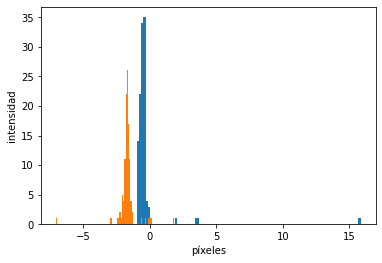

In [171]:
plt.hist(dx,100);
plt.hist(dy,100);
plt.xlabel('píxeles')
plt.ylabel('intensidad')

In [102]:
import scipy.ndimage as ndi

In [103]:
shifted = ndi.shift(images[1].astype(float), [np.nanmedian(dy), np.nanmedian(dx)], order=1)

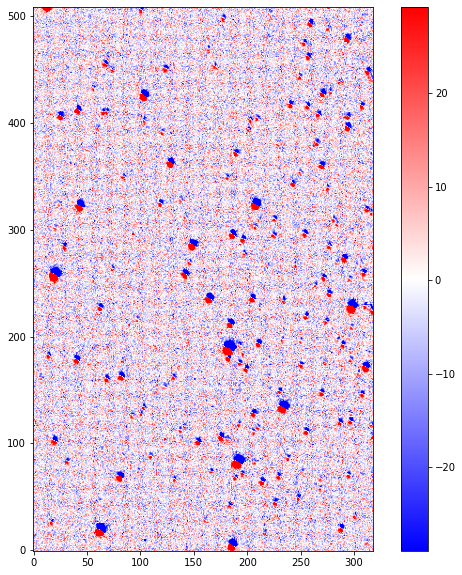

In [133]:
plt.figure(figsize=(10,10))
p =quantile_imshow(images[0]-images[1], cmap='bwr')
plt.colorbar(p)

In [131]:
g = p[250:400,150:300]
plt.colorbar(g)

TypeError: 'AxesImage' object is not subscriptable

In [118]:
shifted_ = ndi.shift(a[1].astype(float), [np.nanmedian(dy), np.nanmedian(dx)], order=1)

RuntimeError: sequence argument must have length equal to input rank

In [122]:
b = image[0]-image[1]
b

array([-10.038004  ,  18.959183  ,  17.56829   ,  -1.3673935 ,   2.4095688 ,   2.862091  ,  -8.09164   ,  -1.2973518 ,
         9.321224  , -13.49085   ,  -3.3094788 ,   0.75748444,   7.7117767 , -14.644089  , -10.199562  ,   5.798378  ,
        -3.6422272 ,  10.113464  ,   4.8118553 ,  -7.514305  , -21.168686  ,   9.290699  ,   0.20279312, -25.194077  ,
         0.14456177,   8.0739975 ,   3.8046646 , -10.278515  , -12.302937  ,   6.6926804 ,  -6.0138016 ,   1.5996666 ,
        -5.80809   ,  10.579796  ,   2.3747444 ,   0.8868637 ,  14.37479   , -12.540524  ,  -5.875477  ,   0.22096634,
        -7.2703323 ,  -0.2104187 ,  -4.4658546 ,  -4.7096786 ,  11.503445  ,   3.4234734 ,   0.3446617 , -16.217022  ,
        -6.9210854 ,  -1.4118423 ,  -8.216396  ,  13.120411  ,  -0.9779091 ,  -6.5089874 , -10.135689  ,  14.777422  ,
        -5.842434  ,  -1.8871956 , -14.088083  , -13.281914  ,  -6.0944633 ,   5.7146034 ,   0.60931396,  21.183151  ,
         4.794388  ,  12.626644  ,  -3.115654  ,

TypeError: Invalid shape (150,) for image data

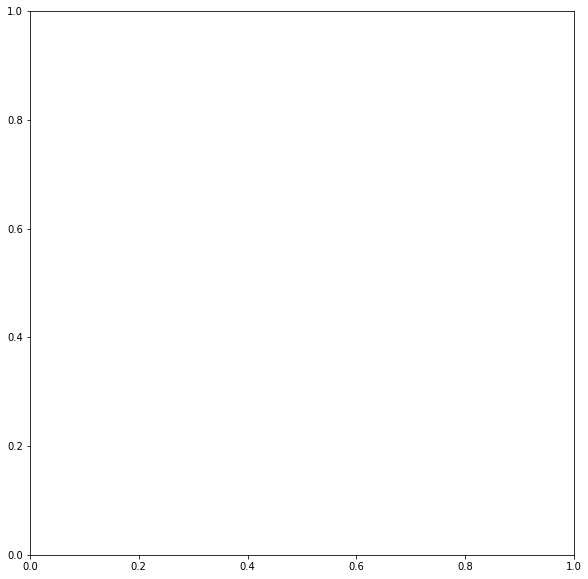

In [127]:
plt.figure(figsize=(10,10))
p_ = quantile_imshow(a[0]-a[1], cmap='bwr')
plt.colorbar(p_)